In [2]:
!git clone https://github.com/fkodom/fft-conv-pytorch.git

fatal: destination path 'fft-conv-pytorch' already exists and is not an empty directory.


In [3]:
%cd fft-conv-pytorch
%cd fft-conv-pytorch
%ls

/content/fft-conv-pytorch
[Errno 2] No such file or directory: 'fft-conv-pytorch'
/content/fft-conv-pytorch
build/        doc/               fft_conv_pytorch.egg-info/  README.md  setup.py
CITATION.cff  fft_conv_pytorch/  LICENSE                     setup.cfg  tests/


In [4]:
!pip install .

Processing /content/fft-conv-pytorch
  Preparing metadata (setup.py) ... done
  Created wheel for fft-conv-pytorch: filename=fft_conv_pytorch-1.2.0-py3-none-any.whl size=6822 sha256=d82181f70e0b8f8506f5917be9451a581d4c40a09febf85055ad40b238c346de
  Stored in directory: /root/.cache/pip/wheels/8d/96/ac/c319373486f7dfdb38d1f3c75708baa644a2f07cdca56a1508
Successfully built fft-conv-pytorch
  Attempting uninstall: fft-conv-pytorch
    Found existing installation: fft-conv-pytorch 1.2.0
    Uninstalling fft-conv-pytorch-1.2.0:
      Successfully uninstalled fft-conv-pytorch-1.2.0


Direct 3D: 100%|██████████| 8/8 [02:59<00:00, 22.50s/it]


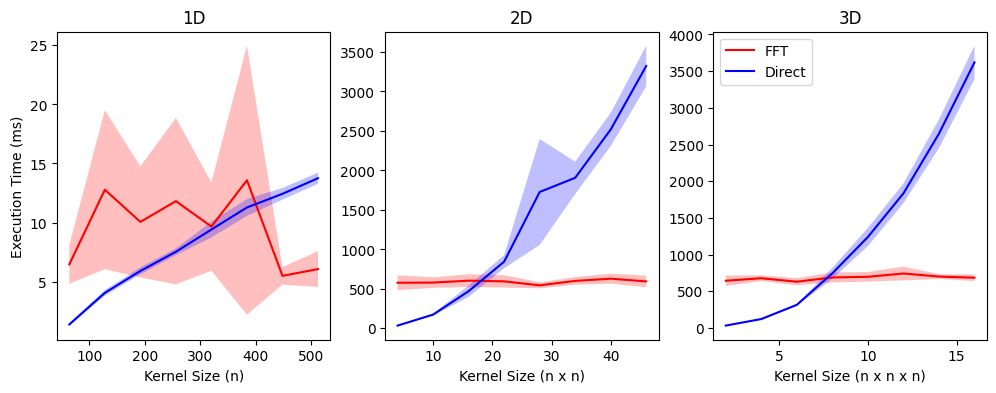

In [4]:
from functools import lru_cache, partial
from typing import Dict, Iterable, List, Optional, Sequence, Union

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as f
from tqdm import tqdm

from fft_conv_pytorch.fft_conv import fft_conv, to_ntuple
from fft_conv_pytorch.utils import Benchmark, benchmark


@lru_cache(maxsize=1)
def _get_conv_inputs(
    ndim: int,
    input_size: int,
    kernel_size: Union[int, Iterable[int]],
    batch_size: int = 2,
    in_channels: int = 8,
    out_channels: int = 8,
):
    dims = ndim * [input_size]
    signal = torch.randn(batch_size, in_channels, *dims)

    kernel_size = to_ntuple(kernel_size, n=signal.ndim - 2)
    weight = torch.randn(out_channels, in_channels, *kernel_size, requires_grad=True)
    bias = torch.randn(out_channels, requires_grad=True)

    return signal, weight, bias


def benchmark_conv(
    ndim: int,
    input_size: int,
    kernel_size: int,
    fft: bool = True,
    num_iterations: int = 10,
):
    conv_fn = fft_conv if fft else getattr(f, f"conv{ndim}d")
    signal, weight, bias = _get_conv_inputs(
        ndim=ndim, input_size=input_size, kernel_size=kernel_size
    )
    return benchmark(conv_fn, signal, weight, bias=bias, num_iterations=num_iterations)


def benchmark_kernel_size(
    kernel_sizes: Sequence[int],
    ndim: int,
    input_size: int,
    fft: bool = True,
    num_iterations: int = 10,
    desc: str = "",
) -> List[Benchmark]:
    fn = partial(
        benchmark_conv,
        ndim=ndim,
        input_size=input_size,
        fft=fft,
        num_iterations=num_iterations,
    )
    return [fn(kernel_size=k) for k in tqdm(kernel_sizes, desc=desc)]


def _plot_benchmarks(
    benchmarks: List[Benchmark],
    config: Dict,
    ax: plt.Axes,
    color: str,
    label: Optional[str] = None,
):
    xs = config["kernel_sizes"]
    ys = np.array([b.mean * 1000 for b in benchmarks])
    std = np.array([b.std * 1000 for b in benchmarks])
    ax.plot(xs, ys, color, label=label)
    ax.fill_between(
        xs, ys - std, ys + std, facecolor=color, alpha=0.25, label="_nolegend_"
    )

    ndim = config["ndim"]
    ax.set_title(f"{ndim}D")
    kernel_size_str = "(" + " x ".join(["n"] * ndim) + ")"
    ax.set_xlabel(f"Kernel Size {kernel_size_str}")


if __name__ == "__main__":
    import os

    configs = [
        {
            "ndim": 1,
            "input_size": 4096,
            "num_iterations": 256,
            "kernel_sizes": np.arange(64, 513, 64),
        },
        {
            "ndim": 2,
            "input_size": 512,
            "num_iterations": 16,
            "kernel_sizes": np.arange(4, 49, 6),
        },
        {
            "ndim": 3,
            "input_size": 64,
            "num_iterations": 16,
            "kernel_sizes": np.arange(2, 17, 2),
        },
    ]

    save_dir = os.path.join(os.path.dirname("./"), os.path.pardir)
    fix, ax = plt.subplots(
        1, len(configs), figsize=(4 * len(configs), 4), squeeze=False
    )

    for i, config in enumerate(configs):
        fft = benchmark_kernel_size(fft=True, **config, desc=f"FFT {config['ndim']}D")
        _plot_benchmarks(fft, config=config, ax=ax[0, i], color="r", label="FFT")

        direct = benchmark_kernel_size(
            fft=False, **config, desc=f"Direct {config['ndim']}D"
        )
        _plot_benchmarks(direct, config=config, ax=ax[0, i], color="b", label="Direct")

    ax[0, 0].set_ylabel("Execution Time (ms)")
    plt.legend(["FFT", "Direct"])
    plt.savefig(os.path.join(save_dir, "benchmark.png"))


In [5]:
%cd ..

/content


In [6]:
!git clone https://github.com/DangLamTung/RepLKNet-pytorch.git

fatal: destination path 'RepLKNet-pytorch' already exists and is not an empty directory.


In [7]:
pip install timm

In [8]:
%cd RepLKNet-pytorch

/content/RepLKNet-pytorch


In [ ]:
!python replknet-fft.py


In [29]:
!python replknet.py

drop path: Identity()
drop path: DropPath(drop_prob=0.013)
drop path: DropPath(drop_prob=0.026)
drop path: DropPath(drop_prob=0.039)
drop path: DropPath(drop_prob=0.052)
drop path: DropPath(drop_prob=0.065)
drop path: DropPath(drop_prob=0.078)
drop path: DropPath(drop_prob=0.091)
drop path: DropPath(drop_prob=0.104)
drop path: DropPath(drop_prob=0.117)
drop path: DropPath(drop_prob=0.130)
drop path: DropPath(drop_prob=0.143)
drop path: DropPath(drop_prob=0.157)
drop path: DropPath(drop_prob=0.170)
drop path: DropPath(drop_prob=0.183)
drop path: DropPath(drop_prob=0.196)
drop path: DropPath(drop_prob=0.209)
drop path: DropPath(drop_prob=0.222)
drop path: DropPath(drop_prob=0.235)
drop path: DropPath(drop_prob=0.248)
drop path: DropPath(drop_prob=0.261)
drop path: DropPath(drop_prob=0.274)
drop path: DropPath(drop_prob=0.287)
drop path: DropPath(drop_prob=0.300)
------------------- training-time model -------------
RepLKNet(
  (stem): ModuleList(
    (0): Sequential(
      (conv): Conv2d